In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from sklearn.metrics import mean_squared_error

In [2]:
img = cv2.imread('Elaine.bmp',0)

In [3]:
def convolve2D(image, kernel, padding=0, strides=1):
  kernel = np.flipud(np.fliplr(kernel))

  xKernShape = kernel.shape[0]
  yKernShape = kernel.shape[1]
  xImgShape = image.shape[0]
  yImgShape = image.shape[1]

  xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
  yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
  output = np.zeros((xOutput, yOutput))

  if padding != 0:
    imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    imagePadded = image

  for y in range(imagePadded.shape[1]):
    if y > imagePadded.shape[1] - yKernShape:
      break
    if y % strides == 0:
      for x in range(imagePadded.shape[0]):
        if x > imagePadded.shape[0] - xKernShape:
          break
        try:
          if x % strides == 0:
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
        except:
          break
    
  output[output>255]=255
  output[output<0]=0
    
  return output

In [4]:
def box_filter (image, window_size, many_times=0):
  filter_matrix = np.ones((window_size, window_size))
  filter_matrix = filter_matrix / (window_size * window_size)

  if many_times:
    box_filtered_image = image

    for round in range(many_times):
      box_filtered_image = convolve2D(box_filtered_image, filter_matrix, 1)
  else:
    box_filtered_image = convolve2D(image, filter_matrix, 1)

  return box_filtered_image.astype(int)

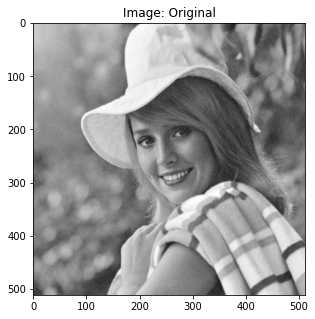

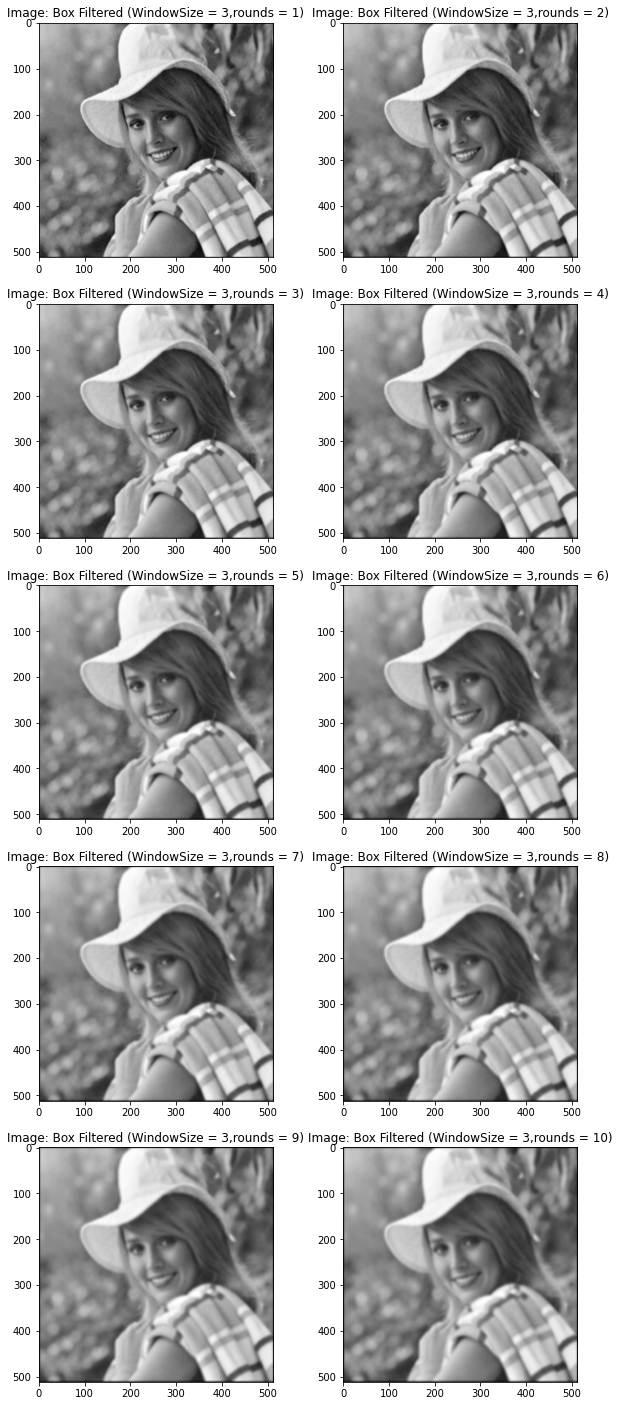

In [5]:
# 3.1.3

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

filter_rounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig, plot = plt.subplots(int(len(filter_rounds) / 2), 2, figsize = (10, 5 * int(len(filter_rounds) / 2)))

window_size = 3

for filter_round in range(0, len(filter_rounds), 2):
  plot[int(filter_round / 2)][0].imshow(box_filter(img, window_size, filter_rounds[filter_round]), cmap='gray')
  plot[int(filter_round / 2)][0].set_title("Image: Box Filtered (WindowSize = " + str(window_size) + ",rounds = " + str(filter_rounds[filter_round]) + ")")

  plot[int(filter_round / 2)][1].imshow(box_filter(img, window_size, filter_rounds[filter_round + 1]), cmap='gray')
  plot[int(filter_round / 2)][1].set_title("Image: Box Filtered (WindowSize = " + str(window_size) + ",rounds = " + str(filter_rounds[filter_round + 1]) + ")")

q_3_1_3_output = box_filter(img, 3, 5)

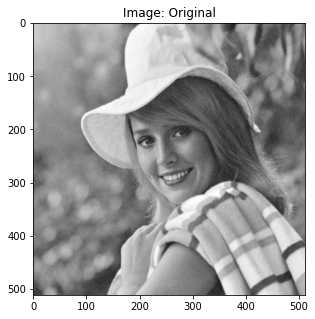

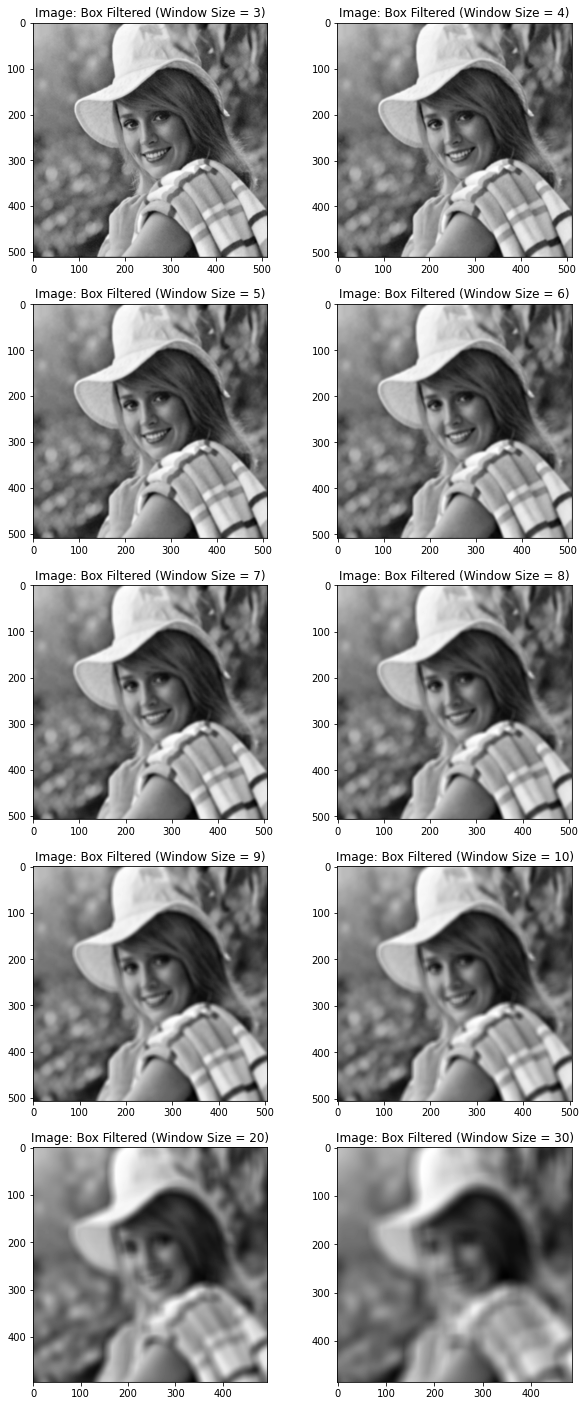

In [6]:
# 3.1.4

fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

window_sizes = [3, 4, 5, 6, 7, 8, 9, 10, 20, 30]

fig, plot = plt.subplots(int(len(window_sizes) / 2), 2, figsize = (10, 5 * int(len(window_sizes) / 2)))

for window_size in range(0, len(window_sizes), 2):
  plot[int(window_size / 2)][0].imshow(box_filter(img, window_sizes[window_size]), cmap='gray')
  plot[int(window_size / 2)][0].set_title("Image: Box Filtered (Window Size = " + str(window_sizes[window_size]) + ")")

  plot[int(window_size / 2)][1].imshow(box_filter(img, window_sizes[window_size + 1]), cmap='gray')
  plot[int(window_size / 2)][1].set_title("Image: Box Filtered (Window Size = " + str(window_sizes[window_size + 1]) + ")")

In [7]:
def laplacian_filter (image, many_times=0):
  filter_matrix = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)])

  if many_times:
    laplacian_filtered_image = image

    for round in range(many_times):
      laplacian_filtered_image = convolve2D(laplacian_filtered_image, filter_matrix)
  else:
    laplacian_filtered_image = convolve2D(image, filter_matrix)

  return laplacian_filtered_image.astype(int)

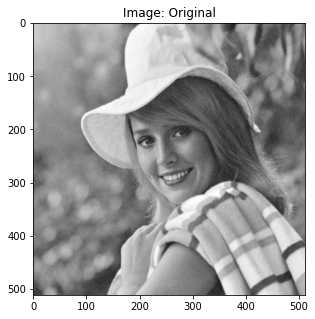

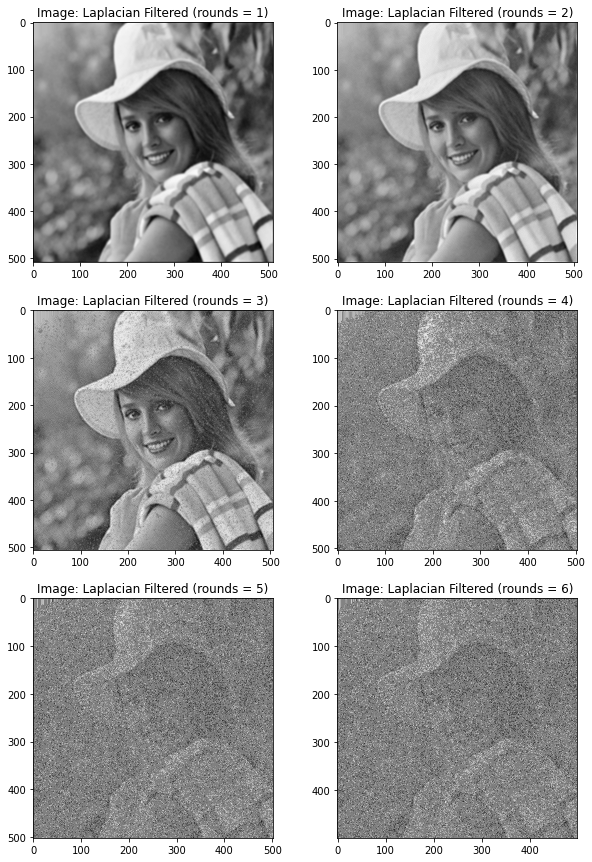

In [8]:
# 3.1.6
fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

filter_rounds = [1, 2, 3, 4, 5, 6]

fig, plot = plt.subplots(int(len(filter_rounds) / 2), 2, figsize = (10, 5 * int(len(filter_rounds) / 2)))

for filter_round in range(0, len(filter_rounds), 2):
  plot[int(filter_round / 2)][0].imshow(laplacian_filter(q_3_1_3_output, filter_rounds[filter_round]), cmap='gray')
  plot[int(filter_round / 2)][0].set_title("Image: Laplacian Filtered (rounds = " + str(filter_rounds[filter_round]) + ")")

  plot[int(filter_round / 2)][1].imshow(laplacian_filter(q_3_1_3_output, filter_rounds[filter_round + 1]), cmap='gray')
  plot[int(filter_round / 2)][1].set_title("Image: Laplacian Filtered (rounds = " + str(filter_rounds[filter_round + 1]) + ")")